<center><font color=#555555><font size=6> Quiantitative Finance Otoño 2021 </font> <br> <br>
    
<center><font color=#555555><font size=5> Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Diego Pintor, Ivette Landaverde, Aranzazú Rendón, Guillermo Gónzalez, Erick Mendoza </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Nov 2021 </a> 

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> PENNINGS AND SERENO </font> <br> <br> <font color= #555555> <font size = 5> Reporte  </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Este estudio establece un enfoque de opciones compuestas para evaluar los proyectos de inversión en I+D farmacéutica en presencia de incertidumbres técnicas y económicas:
- La incertidumbre técnica se modela como un salto de Poisson que permite el fracaso y, por tanto, el abandono del desarrollo del fármaco. 
- La incertidumbre económica se modela como un proceso de difusión estándar que incorpora choques al alza y a la baja. 
    
La aplicación práctica de este método se enfatiza a través de un análisis de casos. Demostramos que ambas incertidumbres tienen un impacto positivo en el valor de la opción de I+D. Además, a partir del análisis de sensibilidad, descubrimos que la sensibilidad de la opción con respecto a la incertidumbre económica y al coste de introducción en el mercado disminuye cuando
la incertidumbre técnica aumenta. </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B>  1. Introduction </font>

La valoración de opciones reales (ROV) es una buena alternativa para el campo farmacéutico, ya que este enfoque puede aportar una mayor evaluación flexible de las oportunidades futuras inherentes al proceso de innovación. 

La farmacéutica interpreta la inversión en el proyecto como una opción para expandir más proyectos. En este caso particular, el éxito en el primer proyecto, daría pie a un segundo proyecto; consecuentemente de la misma manera, el éxito en el segundo proyecto volvería conveniente el entrar a un tercer proyecto, y así sucesivamente hasta plantearse la oportunidad de entrar a un cuarto proyecto. Todo esto le da al proyecto la forma de una call option compuesta.

Las opciones compuestas son combinaciones de opciones, donde el ejercicio de una opción abre otra opción, en la teoría de las opciones reales, las aplicaciones de las opciones compuestas se encuentran en varios proyectos industriales, pero son más relevantes para los productos farmacéuticos donde el proyecto ofrece la opción real de realizar más investigaciones o de iniciar la implementación de los resultados. 

Para este proyecto partimos de un modelo bastante simple, el call de una call option con dos strike prices y dos fechas de maduración.

## Caso de estudio 1

Se utiliza la teoría de opciones reales para evaluar cada una de las fases (3) por la que pasará un nuevo fármaco. 

Se utilizarán las opciones reales al tratar cada fase como un nuevo proyecto en el que se evalúa si vale la pena invertir dependiendo de los resultados del proyecto (o etapa) anterior, y en donde se toma en cuenta el riesgo de fracaso del fármaco en cualquiera de las etapas al combinar una función Poisson (incertidumbre técnica) y un proceso de difusión (incertidumbre económica). 

El valor del proyecto es incierto durante las diferentes etapas, pero asumimos que el valor sigue un proceso de salto normal de difusión, teniendo dos caminos de incertidumbre:

- el riesgo de difusión, que incluye las fluctuaciones aleatorias tanto positivas como negativas
- el arribo de sucesos "mayores" que abruptamente pueden afectar aumentando o disminuyendo el valor del proyecto

De acuerdo a la fórmula del precio, es la misma que la fórmula de opción compuesta de Geske, dando que el fallo técnico no ocurre durante los intérvalos.

Para probar nuestro modelo en un ajuste de negocio práctico, lo aplicaremos en una compañía de Europa enfocada al área de oncología, la cual quiere sacar una nueva línea de tratamientos contra el cáncer y donde tiene dos decisiones de inversión:

- Entrar a la fase 3
- Lanzar el medicamento 

Para esto ambos casos se analizarán con la fórmula de opciones compuestas.

## Caso de estudio 2

Fase 1: pruebas en 20-100 voluntarios para determinar la seguridad y la dosis

Fase 2: pruebas en 100-300

Fase 3: pruebas en 1000-5000

Para evaluar el desarrollo del fármaco, se valúa una opción compuesta que, en el momento T2, le da a la empresa el derecho a pagar I2 para comprar la opción subyacente, que tiene un precio de ejercicio I1 y una fecha de ejercicio T1, estos datos consideran como un proyecto el que el fármaco haya aprobado todas las fases y como otro, el lanzarlo al mercado. 

Datos: 
 
  
V0 = €67 Million 

 
I1 = €27 Million 

 
I2 = €19 Million 

 
T1 = 5Years 

 
T2 = 1Year 

 
sigma ranges from 23 to 57% 

 
r= 2.4% 

 
lambda = 7.6% 


Valor opción: 33.45  Million

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>


In [1]:
import numpy as np
import scipy.stats as si
from scipy.stats import multivariate_normal as mvn
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 3. Data Description </font>

In [2]:
T1 = 5
T2 = 1
r = 0.024
q = 0
sigma = 0.23
S = 67
X1 = 27
X2 = 19
tau = T2-T1
l = 0.076

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 4. Functions </font>

In [ ]:
def Call(S,K,T,r,l, sigma):
    d1 = (np.log(S/K) + (r+l + 0.5 * sigma ** 2) * T)/ (sigma * np.sqrt(T))
    #d2 = (np.log(S/K) + (r+l - 0.5 * sigma ** 2) * T)/ (sigma * np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    Call = np.exp(-l*T)*(S*np.exp(l*T) * si.norm.cdf(d1,0.0,1.0) - K * np.exp(-r * T) * 
                         si.norm.cdf(d2,0.0,1.0))
    return Call


def Vopt(S,K,t,r,l,sigma):
    """
    Función Vopt
    Cálculo del Valor a partir del cuál se vuelve rentable trabajar en la siguiente etapa
    del proyecto. (Sección en construcción)
    Minimiza un Call cuyo valor de ejercicio es el valor definido para la siguiente etapa.
    """
    tau = t[1]-t[0]
    bounds = [[0, None]]
    apply_constraint1 = lambda S: Call(S, K[0], tau, r,l, sigma) - K[1] # Tiene que ser igual a la X siguiente
    my_constraints = ({'type': 'eq','fun': apply_constraint1})
    a = minimize(Call, S, bounds=bounds, constraints=my_constraints, method='SLSQP', args=(K[0], tau,
                                                                                           r,l, sigma))
    return a.x[0] #precio justo de la opcion   
# Restricción para 2 fases: Restricción pasada    
    
def hk(V,Vopt,r,l,sigma,T):
    """
    Función hk
    Esta función obtiene el valor de h para opciones compuestas. Equivalente al cálculo de
    D1 en Black-Scholes.
    """
    return (np.log(V/Vopt) + (r+l + 0.5 * sigma ** 2) * T)/ (sigma * np.sqrt(T))

def lk(h,sigma,T):
    """
    Función lk
    Obtiene el valor de l a partir del valor calculado previamente de h. Equivalente al cálculo
    de D2 en Black-Scholes.
    """
    return h-sigma*np.sqrt(T)
def corrMatrix(T):
    """
    Función corrMatrix
    Esta función obtiene la matriz de correlación simétrica para N tiempos 
    Los valores de correlación son la raíz cuadrada del cociente de los tiempos.
    """
    cov = np.ones((len(T),len(T)))
    for i in range(len(T)):
        for j in range(len(T)):
            if i<=j:
                cov[j,i] = np.sqrt(T[i]/T[j])
            else:
                cov[j,i] = np.sqrt(T[j]/T[i])
    return cov

def NcompoundOption(S,K,tiempo,r,l,sigma):
    """
    Función NcompoundOption
    Generalización del modelo de N-anidadas opciones compuestas.
    """
    N = len(tiempo) 
    suma = np.zeros(N) 
    hs = np.zeros(N)
    ls = np.zeros(N)
    Vo = np.zeros(N)
    ehepaar = np.array(K[:2]) # TIene que agarrar slice de los K's recibidos
    Vo[0] = Vopt(S,ehepaar,tiempo,r,l,sigma)
    # Primer ciclo, cálculo de ls y hs
    for j in range(len(tiempo)):
        if j == len(tiempo)-1: #En el tiempo final, el valor óptimo de ejercicio es igual a I2
            Vo[j] = K[j]
            hs[j] = hk(S,Vo[j],r,l,sigma,tiempo[j])
            ls[j] = lk(hs[j],sigma,tiempo[j])
        else:
            Vo[j] = Vopt(S,ehepaar,tiempo,r,l,sigma)
             #Tiene que agarrar Slice de Ehepaar
            hs[j] = hk(S,Vo[j],r,l,sigma,tiempo[j])
            ls[j] = lk(hs[j],sigma,tiempo[j])
            ehepaar = np.array([Vo[j],K[j]])
    # Segundo ciclo, distribuciones y suma
    for j in range(len(tiempo)):
        dist = mvn(mean=np.zeros(N+1-(j+1)),cov=corrMatrix(tiempo[0:N+1-(j+1)]))

        if N+1-(j+1) == 1:
            suma[j] = K[j]*np.exp(-(r+l)*tiempo[j])*dist.cdf(ls[j-1])
        else:
            #print(ls[j:N+1-(j)])
            suma[j] = K[j]*np.exp(-(r+l)*tiempo[j])*dist.cdf(ls[j:])
    dist = mvn(mean=np.zeros(N),cov=corrMatrix(tiempo))
    #print(S*dist.cdf(hs),-suma)
    return S*dist.cdf(hs)-suma.sum()
tiempo = [T2,T1]
ks = [X2,X1]

prueba = NcompoundOption(S,ks,tiempo,r,l,sigma)
print(prueba)

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 5. Process </font>

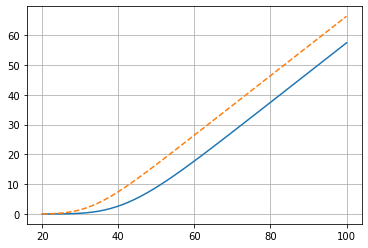

In [4]:
###  Observación de la sensibilidad del modelo
S = np.linspace(20,100)
prueba = []
pruebalambda = []
l = 0.076
for s in S:
    prueba.append(NcompoundOption(s,ks,tiempo,r,0,sigma))
    pruebalambda.append(NcompoundOption(s,ks,tiempo,r,l,sigma))

plt.xticks(np.arange(0, 100+1, 20))
plt.yticks(np.arange(0, 60+1, 10))
plt.plot(S,prueba)
plt.plot(S,pruebalambda,linestyle="dashed");
plt.grid()


In [5]:
S = 67
l = [0.076,0.1]
sigma = np.linspace(0.2,1)
volSensl0 = []
volSensl1 = []
volSensl2 = []
for s in sigma:
    volSensl0.append(NcompoundOption(S,ks,tiempo,r,0,s))
    volSensl1.append(NcompoundOption(S,ks,tiempo,r,l[0],s))
    volSensl2.append(NcompoundOption(S,ks,tiempo,r,l[1],s))

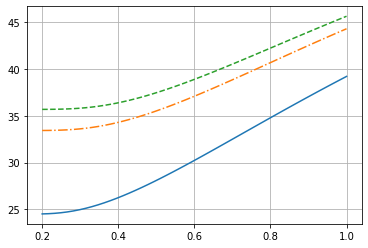

In [6]:
plt.xticks(np.arange(0, 1.1,0.2))
plt.yticks(np.arange(25, 50, 5))
plt.plot(sigma,volSensl0)
plt.plot(sigma,volSensl1,linestyle="-.")
plt.plot(sigma,volSensl2,linestyle="dashed");
plt.grid()

In [7]:
S = 67
ks = [[19,14],[19,27],[19,54]]
sigma = 0.23
l = np.linspace(0,1)
LSensl0 = []
LSensl1 = []
LSensl2 = []
for la in l:
    LSensl0.append(NcompoundOption(S,ks[0],tiempo,r,la,sigma))
    LSensl1.append(NcompoundOption(S,ks[1],tiempo,r,la,sigma))
    LSensl2.append(NcompoundOption(S,ks[2],tiempo,r,la,sigma))

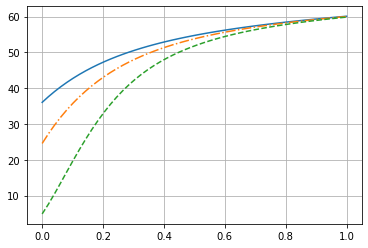

In [8]:
plt.xticks(np.arange(0, 1.1,0.2))
plt.yticks(np.arange(0, 81, 10))
plt.plot(l,LSensl0)
plt.plot(l,LSensl1,linestyle="-.")
plt.plot(l,LSensl2,linestyle="dashed");
plt.grid()

In [9]:
sigdf = [0.23, 0.48, 0.57]
Vodf = [67, 75, 90, 100]
l = [0, 0.076, 0.1]
ks = [19,27]
l0 = np.zeros((4,3))
l007 = np.zeros((4,3))
l01 = np.zeros((4,3))
# i filas j columnas

In [10]:
for i in range(4):
    for j in range(3):
        l0[i,j] = NcompoundOption(Vodf[i],ks,tiempo,r,l[0],sigdf[j])
        l007[i,j] = NcompoundOption(Vodf[i],ks,tiempo,r,l[1],sigdf[j])
        l01[i,j] = NcompoundOption(Vodf[i],ks,tiempo,r,l[2],sigdf[j])

In [11]:
# Escenario Propuesto 
# 4 etapas, función que regresa los valores óptimos del proyecto para avanzar a la siguiente fase
def NcompoundOption(S,K,tiempo,r,l,sigma):
    """
    Función NcompoundOption
    Generalización del modelo de N-anidadas opciones compuestas.
    """
    N = len(tiempo) 
    suma = np.zeros(N) 
    hs = np.zeros(N)
    ls = np.zeros(N)
    Vo = np.zeros(N)
    ehepaar = np.array(K[:2]) # TIene que agarrar slice de los K's recibidos
    Vo[0] = Vopt(S,ehepaar,tiempo,r,l,sigma)
    # Primer ciclo, cálculo de ls y hs
    for j in range(len(tiempo)):
        if j == len(tiempo)-1: #En el tiempo final, el valor óptimo de ejercicio es igual a I2
            Vo[j] = K[j]
            hs[j] = hk(S,Vo[j],r,l,sigma,tiempo[j])
            ls[j] = lk(hs[j],sigma,tiempo[j])
        else:
            Vo[j] = Vopt(S,ehepaar,tiempo,r,l,sigma)
             #Tiene que agarrar Slice de Ehepaar
            hs[j] = hk(S,Vo[j],r,l,sigma,tiempo[j])
            ls[j] = lk(hs[j],sigma,tiempo[j])
            ehepaar = np.array([Vo[j],K[j]])
    # Segundo ciclo, distribuciones y suma
    for j in range(len(tiempo)):
        dist = mvn(mean=np.zeros(N+1-(j+1)),cov=corrMatrix(tiempo[0:N+1-(j+1)]))

        if N+1-(j+1) == 1:
            suma[j] = K[j]*np.exp(-(r+l)*tiempo[j])*dist.cdf(ls[j-1])
        else:
            #print(ls[j:N+1-(j)])
            suma[j] = K[j]*np.exp(-(r+l)*tiempo[j])*dist.cdf(ls[j:])
    dist = mvn(mean=np.zeros(N),cov=corrMatrix(tiempo))
    #print(S*dist.cdf(hs),-suma)
    return S*dist.cdf(hs)-suma.sum(), Vo


T1 = 5
T2 = 3
T3 = 2
T4 = 1
r = 0.024
q = 0
sigma = 0.23 
S = 67
X1 = 27
X2 = 19
X3 = 17
X4 = 15
l = 0.076

etapasTiempo = [[1,5],[1,3,5],[1,2,3,5]]
etapasK = [[X2,X1],[X3,X2,X1],[X4,X3,X2,X1]]

propuesta, optimos = NcompoundOption(S,ks,tiempo,r,l,sigma)
print(propuesta, optimos)

33.45110933696857 [39.71398782 27.        ]


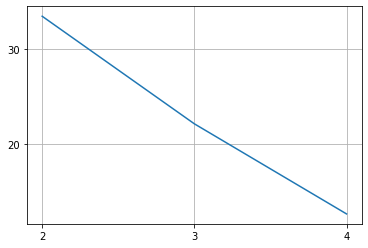

In [12]:
x = np.arange(2,5)
y = np.zeros(3)
for i in range(3):
    y[i],_ = NcompoundOption(S,etapasK[i],etapasTiempo[i],r,l,sigma)
plt.xticks(np.arange(0, 5,1))
plt.yticks(np.arange(0, 35+1, 10))
plt.plot(x,y)
plt.grid()
# Valor del contrato dadas N etapas

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 6. Conclusión </font>

Al desarrollar todo este proyecto, aplicando los modelos anteriores y la función que nos ayuda al cálculo de una serie de "n" calls de una call option, podemos ver que el proyecto farmacéutico puede ser modelado como una serie de subproyectos, donde la inversión en cada paso es resultado del éxito o fracaso del paso anterior. 

Encontramos dificultades para encontrar la forma de calcular el 3er y 4to paso del proyecto de manera manual, y nos resultó más sencillo y a la vez más útil el poder trabajar dejando nuestra función lista para "n" pasos, lo cual nos deja automatizado el proceso del cálculo en algún otro proyectoque requiera mayor cantidad de pasos.

Además, estábamos teniendo complicaciones a la hora de intentar replicar las escalas que se presentan en el documento del proyecto, ya que en nuestro proceso los gráficos de los resultados estaban ligeramente desfasados respecto a los originales.

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B>  7. References </font>

European Journal of Operational Research

<hr style="border:0.02in solid gray"> </hr>

<hr style="border:0.02in solid gray"> </hr>